In [ ]:
import cv2
import math
import PIL
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import skimage.color
import skimage.segmentation
import skimage.measure
import skimage.feature
import skimage.morphology
import scipy.ndimage

Лабораторная работа 4
Морфологический анализ изображения

4 Основные функции
1.Дилатация
2.Эрозия
3.Открытие изображения
4.Закрытие изображения

Дилатация - метод обратный эрозии. Он расширяет структуру исходного изображения в зависимости от свертки структурирующего элемента с исходным изображением. Если элемент структурирования попадает в исходное изображение в пикселе p, значение устанавливается на 1, иначе 0. В результате выполнения дилатации могут окраситься впадины в объектах и пустоты в изображениях, чей диаметр меньше структурного элемента.

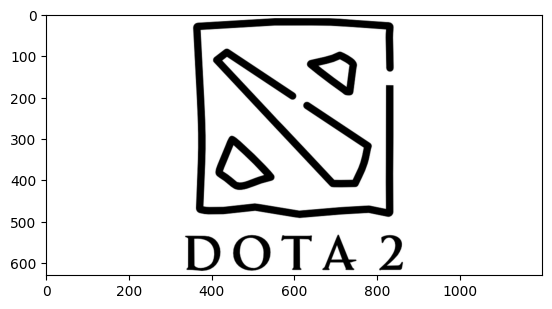

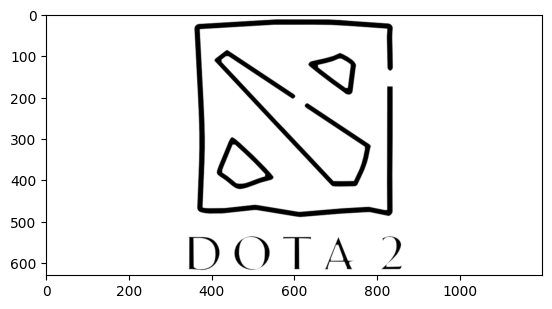

In [ ]:
#Дилатация изображения
imageObj = cv2.imread("Лаба4Обр.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()
# Creating kernel
kernel = np.ones((6, 6), np.uint8)

# Using cv2.erode() method
image = cv2.dilate(imageObj, kernel, iterations = 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()




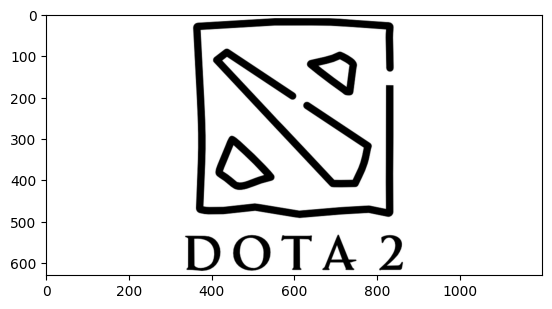

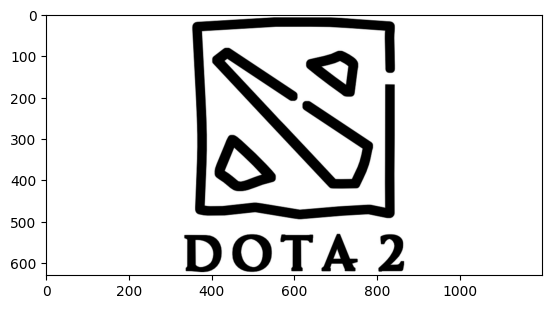

In [ ]:
#Эрозия изображения
imageObj = cv2.imread("Лаба4Обр.png")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

kernel = np.ones((6, 6), np.uint8)
image = cv2.erode(imageObj, kernel,  iterations = 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


Открытие включает размывание с последующим расширением внешней поверхности (переднего плана) изображения. Здесь применимы все вышеупомянутые ограничения для размывания и расширения. Это сочетание двух основных методов. Обычно он используется для удаления шума на изображении.

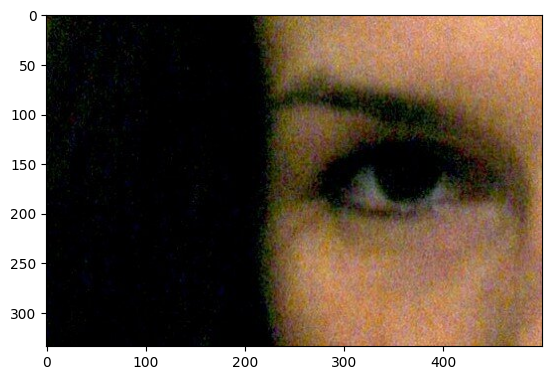

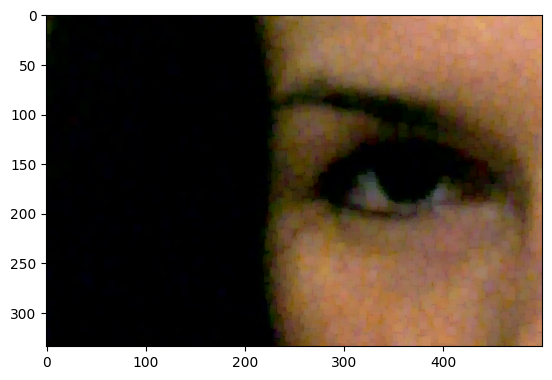

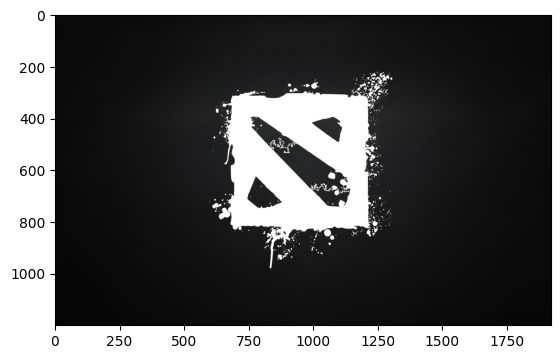

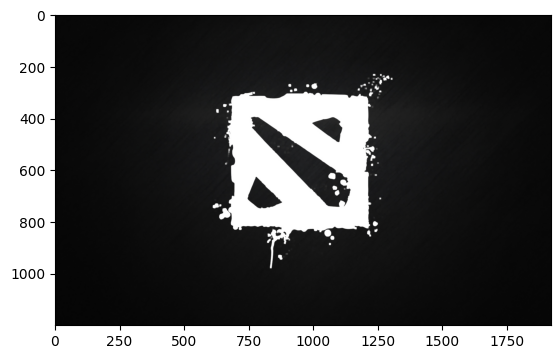

In [ ]:
#Открытие
imageObj = cv2.imread("изображение с шумом.jpeg")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

kernel = np.ones((6, 6), np.uint8)
opening = cv2.morphologyEx(imageObj, cv2.MORPH_OPEN, kernel)

plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()

imageObj = cv2.imread("Дот1.jpg")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

kernel = np.ones((6, 6), np.uint8)
opening = cv2.morphologyEx(imageObj, cv2.MORPH_OPEN, kernel)

plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()


Закрытие включает расширение с последующей эрозией внешней поверхности (переднего плана) изображения. Здесь применимы все вышеупомянутые ограничения для эрозии и расширения. Это сочетание двух основных методов. Обычно он используется для удаления шума на изображении.

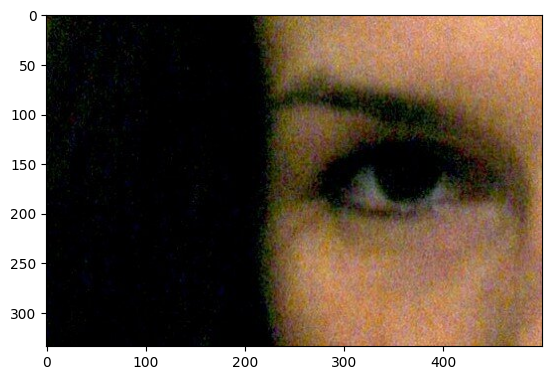

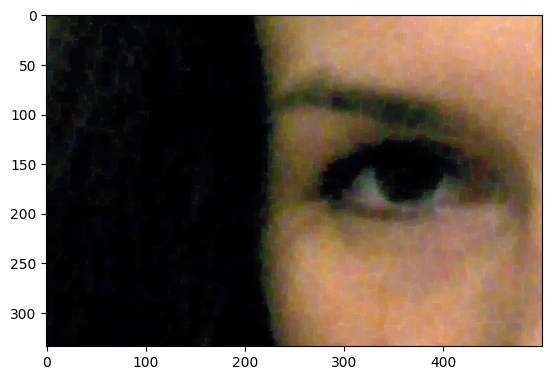

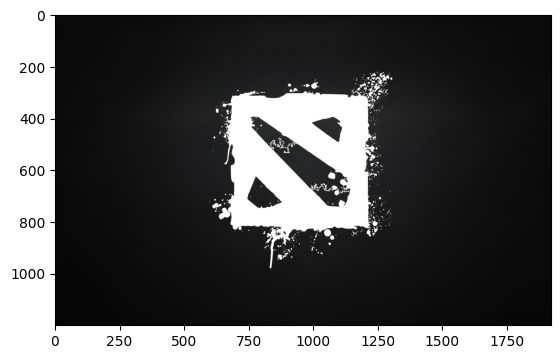

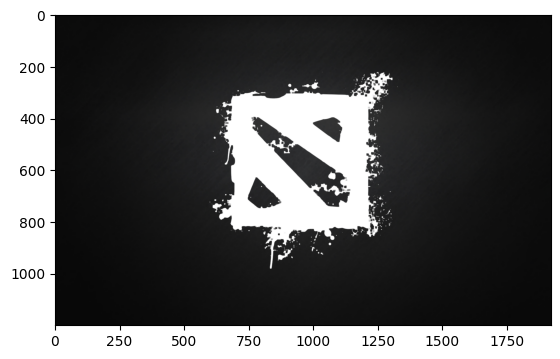

In [ ]:
#Закрытие
imageObj = cv2.imread("изображение с шумом.jpeg")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

kernel = np.ones((6, 6), np.uint8)
opening = cv2.morphologyEx(imageObj, cv2.MORPH_CLOSE, kernel)

plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()

imageObj = cv2.imread("Дот1.jpg")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

kernel = np.ones((6, 6), np.uint8)
opening = cv2.morphologyEx(imageObj, cv2.MORPH_CLOSE, kernel)

plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()


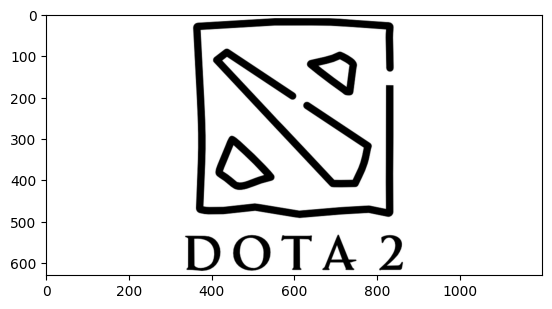

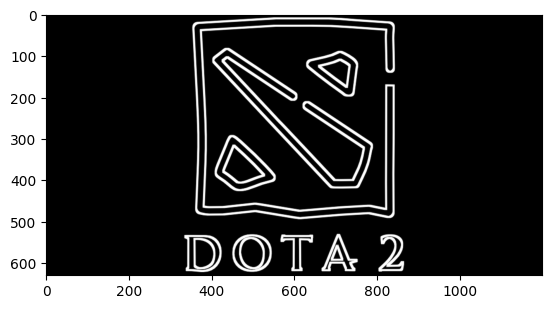

In [ ]:
#Градиент
imageObj = cv2.imread("Лаба4Обр.png")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

kernel = np.ones((6, 6), np.uint8)
opening = cv2.morphologyEx(imageObj, cv2.MORPH_GRADIENT, kernel)

plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()

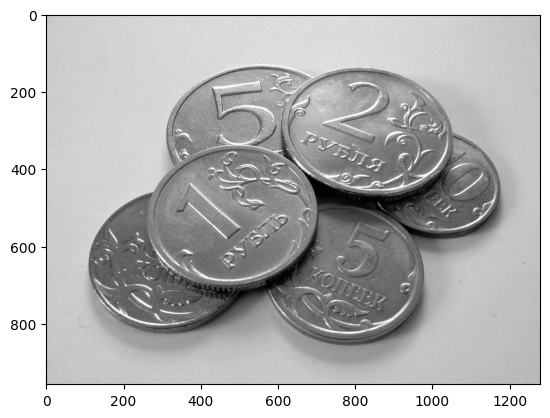

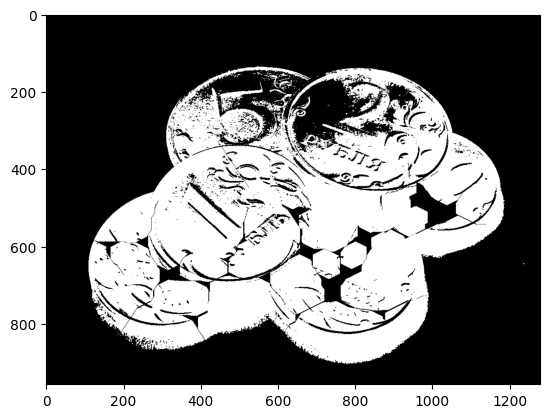

In [ ]:
#Разделение  склееных объектов
I = cv2.imread("монеты2.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.show()

ret, Inew = cv2.threshold(I, 160, 255, cv2.THRESH_BINARY_INV)

B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Erosion
BW2 = cv2.morphologyEx(Inew, cv2.MORPH_ERODE, B, iterations=14, borderType=cv2.BORDER_CONSTANT, borderValue=0)

# Dilation
T = np.zeros_like(Inew)

while cv2.countNonZero(BW2) < BW2.size:
    D = cv2.dilate(BW2, B, borderType=cv2.BORDER_CONSTANT, borderValue=0)
    C = cv2.morphologyEx(D, cv2.MORPH_CLOSE, B, borderType=cv2.BORDER_CONSTANT, borderValue=0)
    S = C - D
    T = cv2.bitwise_or(S, T)
    BW2 = D

# Closing for borders
T = cv2.morphologyEx(T, cv2.MORPH_CLOSE, B, iterations=14, borderType=cv2.BORDER_CONSTANT, borderValue=255)

# Remove borders from an image
Inew = cv2.bitwise_and(~T, Inew)

plt.imshow(cv2.cvtColor(Inew, cv2.COLOR_BGR2RGB))
plt.show()

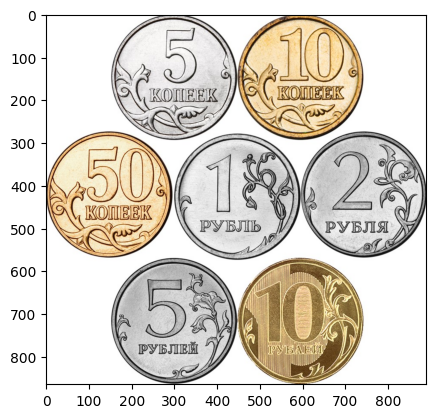

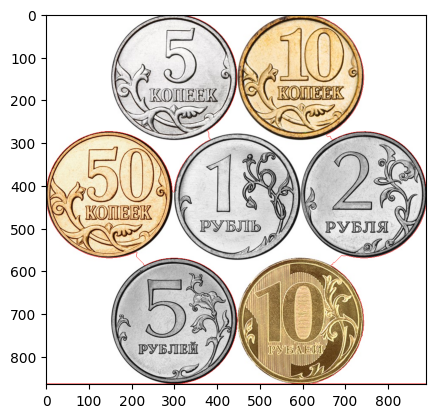

In [ ]:
# Read an image
I = cv2.imread("монеты.jpg")
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.show()

# Convert to grayscale
I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Convert to black and white
ret, I_bw = cv2.threshold(I_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Remove small white regions
def bwareaopen(A, dim, conn=8):
    if A.ndim > 2:
        return None
    # Convert to np.uint8
    A = A.astype(np.uint8)
    # Find all connected components
    num, labels, stats, centers = cv2.connectedComponentsWithStats(A, connectivity=conn)
    # Check size of all connected components
    for i in range(num):
        if stats[i, cv2.CC_STAT_AREA] < dim:
            A[labels == i] = 0
    return A

I_bw = bwareaopen(I_bw, 20, 4)

# Define structuring element
B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Perform morphological closing
I_bw = cv2.morphologyEx(I_bw, cv2.MORPH_CLOSE, B)

# Perform distance transformation
I_fg = cv2.distanceTransform(I_bw, cv2.DIST_L2, 5)

# Threshold foreground markers
ret, I_fg = cv2.threshold(I_fg, 0.6 * I_fg.max(), 255, 0)
I_fg = cv2.normalize(I_fg, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
# Find connected components
ret, markers = cv2.connectedComponents(I_fg)

# Find background location
I_bg = np.zeros_like(I_bw)
markers_bg = markers.copy()
markers_bg = cv2.watershed(I, markers_bg)
I_bg[markers_bg == -1] = 255

# Define undefined area
I_unk = cv2.subtract(~I_bg, I_fg)

# Define all markers
markers = markers + 1
markers[I_unk == 255] = 0

# Perform watershed
markers = cv2.watershed(I, markers)

# Prepare for visualization
markers_jet = cv2.applyColorMap((markers.astype(np.float32) * 255 / (ret + 1)).astype(np.uint8), cv2.COLORMAP_JET)
I[markers == -1] = (0, 0, 255)

plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.show()

Альтернативная сигментация через библиотеку SCy


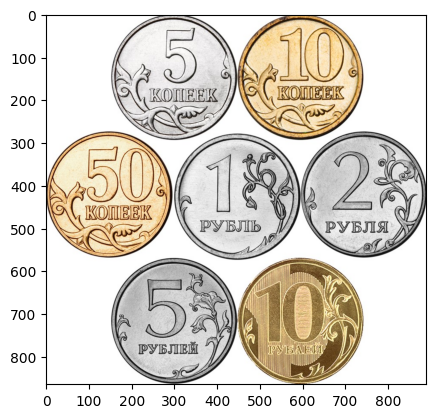

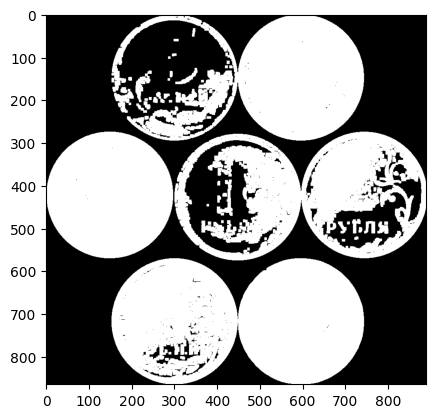

In [ ]:
imageObj = cv2.imread("монеты.jpg")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

kernel = np.ones((6, 6), np.uint8)
opening = cv2.morphologyEx(imageObj, cv2.MORPH_CLOSE, kernel)
opening = opening[:,:,0] < 230
plt.imshow(cv2.cvtColor(np.uint8(opening * 255), cv2.COLOR_GRAY2RGB))
plt.show()



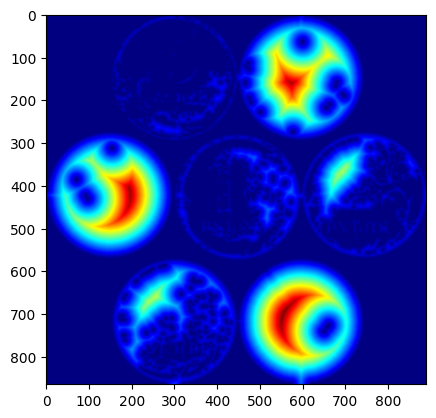

In [ ]:
# Составление рельефа
RELEF= scipy.ndimage.distance_transform_edt(opening)
#Построим глбину впадины
RELEF = np.float32(RELEF / np.max(RELEF))
RELEF = cv2.applyColorMap(np.uint8(RELEF * 255), cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(RELEF, cv2.COLOR_BGR2RGB))
plt.show()

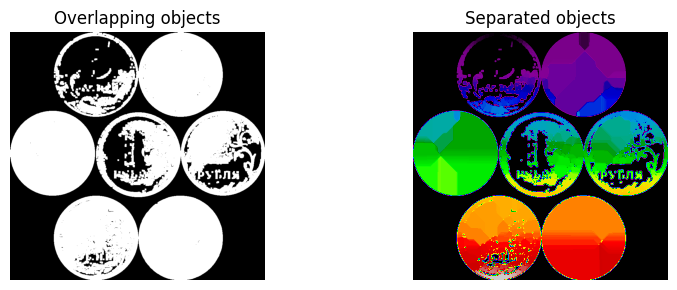

In [102]:
# Полученная сигментация
image = cv2.imread("монеты.jpg")

kernel = np.ones((6, 6), np.uint8)
opening = cv2.morphologyEx(imageObj, cv2.MORPH_CLOSE, kernel)
opening = opening[:,:,0] < 230
image = opening

distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()
